In [1]:
using LinearAlgebra
using Distributions

using LaTeXStrings
using Printf
using FileIO
import JLD2

In [2]:
#using Plots
#using StatsPlots

In [2]:
using DataFrames


In [214]:
using Revise
using Newtrinos
using Newtrinos.osc

In [4]:
using Pkg
Pkg.status() 

Status `~/.julia/environments/myenv/Project.toml`
⌃ [13f3f980] CairoMakie v0.13.6
⌃ [7073ff75] IJulia v1.27.0
  [5b289081] Newtrinos v1.0.0-DEV `~/Newtrinos.jl`
⌃ [295af30f] Revise v3.7.5
⌃ [3cd96dde] UnROOT v0.8.20
Info Packages marked with ⌃ have new versions available and may be upgradable.


In [215]:
osc_cfg = Newtrinos.osc.OscillationConfig(
    flavour=Newtrinos.osc.NND(),
    propagation=Newtrinos.osc.Basic(),
    states=Newtrinos.osc.All(),
    interaction=Newtrinos.osc.SI()
    )

osc = Newtrinos.osc.configure(osc_cfg)

Newtrinos.osc.Osc(OscillationConfig{NND, SI, Basic, Newtrinos.osc.All}(NND(ThreeFlavour(:NO)), SI(), Basic(), Newtrinos.osc.All()), (θ₁₂ = 0.5872523687443223, θ₁₃ = 0.1454258194533693, θ₂₃ = 0.8556288707523761, δCP = 1.0, Δm²₂₁ = 7.53e-5, Δm²₃₁ = 0.0024752999999999997, m₀ = 0.01, N = 20.0, r = 1.0), (θ₁₂ = Uniform{Float64}(a=0.4205343352839651, b=0.7853981633974483), θ₁₃ = Uniform{Float64}(a=0.1, b=0.2), θ₂₃ = Uniform{Float64}(a=0.5235987755982988, b=1.0471975511965976), δCP = Uniform{Float64}(a=0.0, b=6.283185307179586), Δm²₂₁ = Uniform{Float64}(a=6.5e-5, b=9.0e-5), Δm²₃₁ = Uniform{Float64}(a=0.002, b=0.003), m₀ = Uniform{Float64}(a=0.001, b=1.0), N = Uniform{Float64}(a=1.0, b=90.0), r = Uniform{Float64}(a=1.0e-8, b=1.0)), Newtrinos.osc.var"#get_Nnaturalness#46"(), Newtrinos.osc.var"#osc_prob#39"{Newtrinos.osc.var"#osc_prob#37#40"{OscillationConfig{NND, SI, Basic, Newtrinos.osc.All}}}(Newtrinos.osc.var"#osc_prob#37#40"{OscillationConfig{NND, SI, Basic, Newtrinos.osc.All}}(OscillationC

In [216]:

atm_flux = Newtrinos.atm_flux.configure()
earth_layers = Newtrinos.earth_layers.configure()
xsec=Newtrinos.xsec.configure()
physics = (; osc, atm_flux, earth_layers, xsec);

In [217]:
experiments = (
 
    nova= Newtrinos.nova.configure(physics),
);

=== LOADING NUE DATA ===
Using :fN for neutrino data
Found MC directory: prediction_components_nue_fhc
Using :fN field, length: 23
Created: Signal1, Signal2, Signal3
Using :fN field, length: 23
Created: Wrong_sign_bkg1, Wrong_sign_bkg2, Wrong_sign_bkg3
Using :fN field, length: 23
Created: Beam_nue_bkg1, Beam_nue_bkg2, Beam_nue_bkg3
Using :fN field, length: 23
Created: NC_bkg1, NC_bkg2, NC_bkg3
Using :fN field, length: 23
Created: NumuCC_bkg1, NumuCC_bkg2, NumuCC_bkg3
Using :fN field, length: 23
Created: TauCC_bkg1, TauCC_bkg2, TauCC_bkg3
Using :fN field, length: 23
Created: Cosmic_bkg1, Cosmic_bkg2, Cosmic_bkg3
Using :fN field, length: 23
Created: Total_pred1, Total_pred2, Total_pred3
=== LOADING NUEBAR DATA ===
Using :fN for antineutrino data
Found MC directory: prediction_components_nue_rhc
Using :fN field, length: 23
Created: Signal1, Signal2, Signal3
Using :fN field, length: 23
Created: Wrong_sign_bkg1, Wrong_sign_bkg2, Wrong_sign_bkg3
Using :fN field, length: 23
Created: Beam_nue_

[ Info: Loading NOvA data


In [218]:
p = Newtrinos.get_params(experiments)

(N = 20.0, m₀ = 0.01, nc_norm = 1.0, nutau_cc_norm = 1.0, r = 1.0, Δm²₂₁ = 7.53e-5, Δm²₃₁ = 0.0024752999999999997, δCP = 1.0, θ₁₂ = 0.5872523687443223, θ₁₃ = 0.1454258194533693, θ₂₃ = 0.8556288707523761)

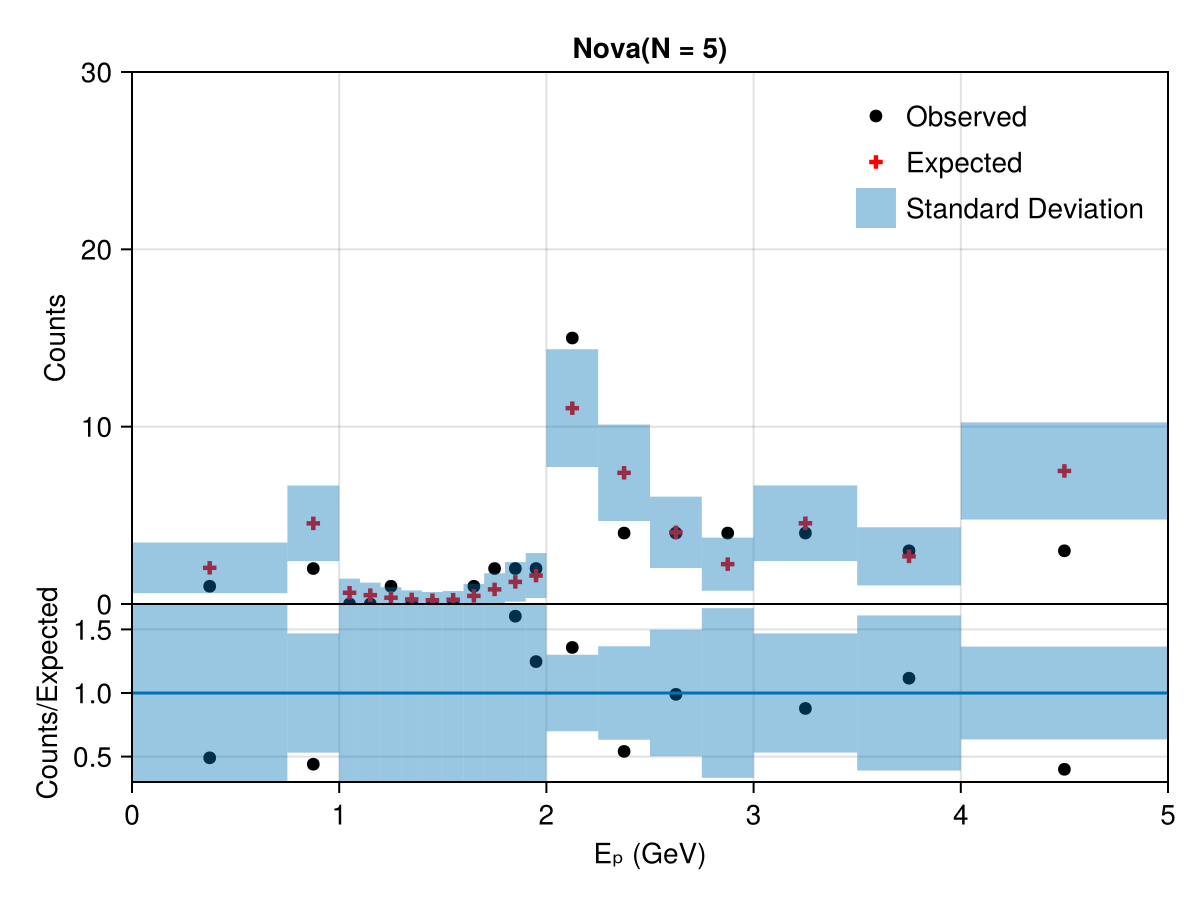

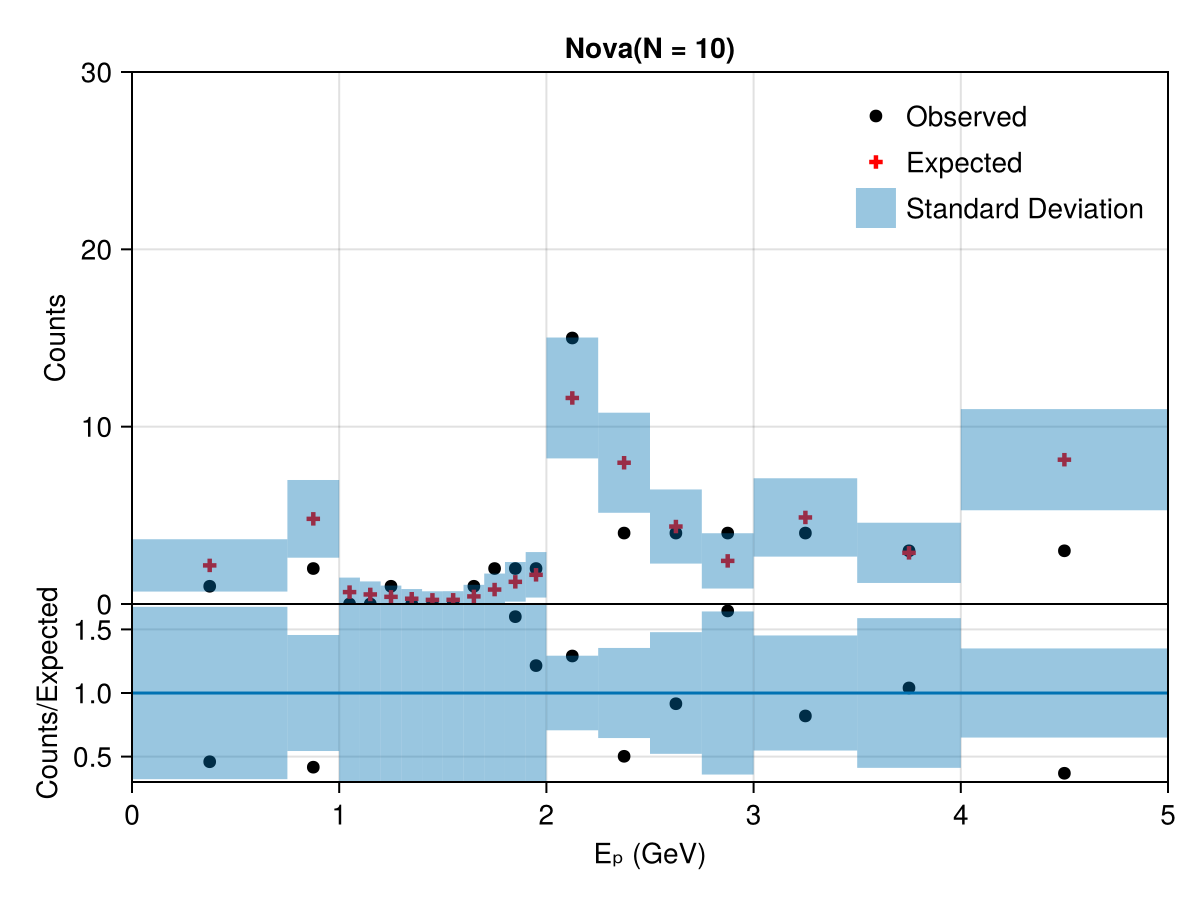

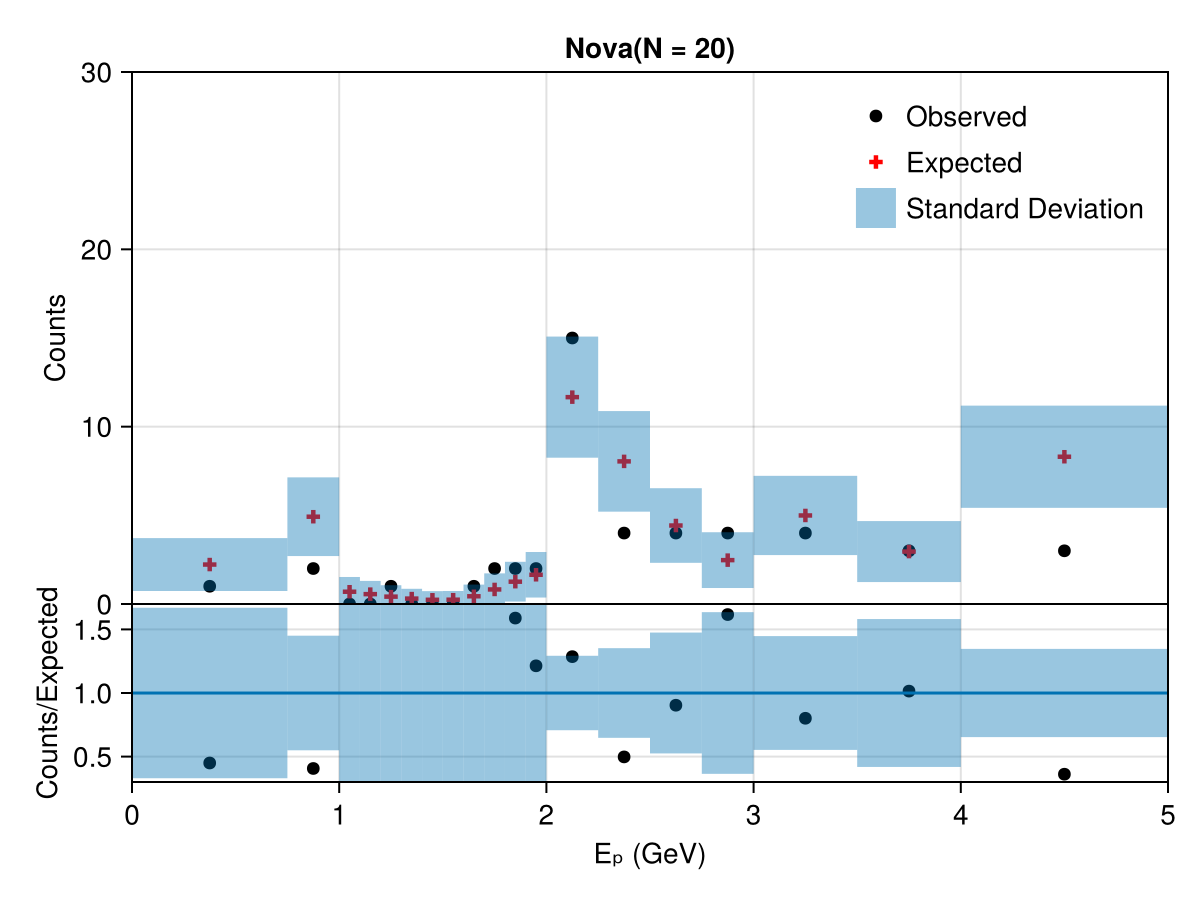

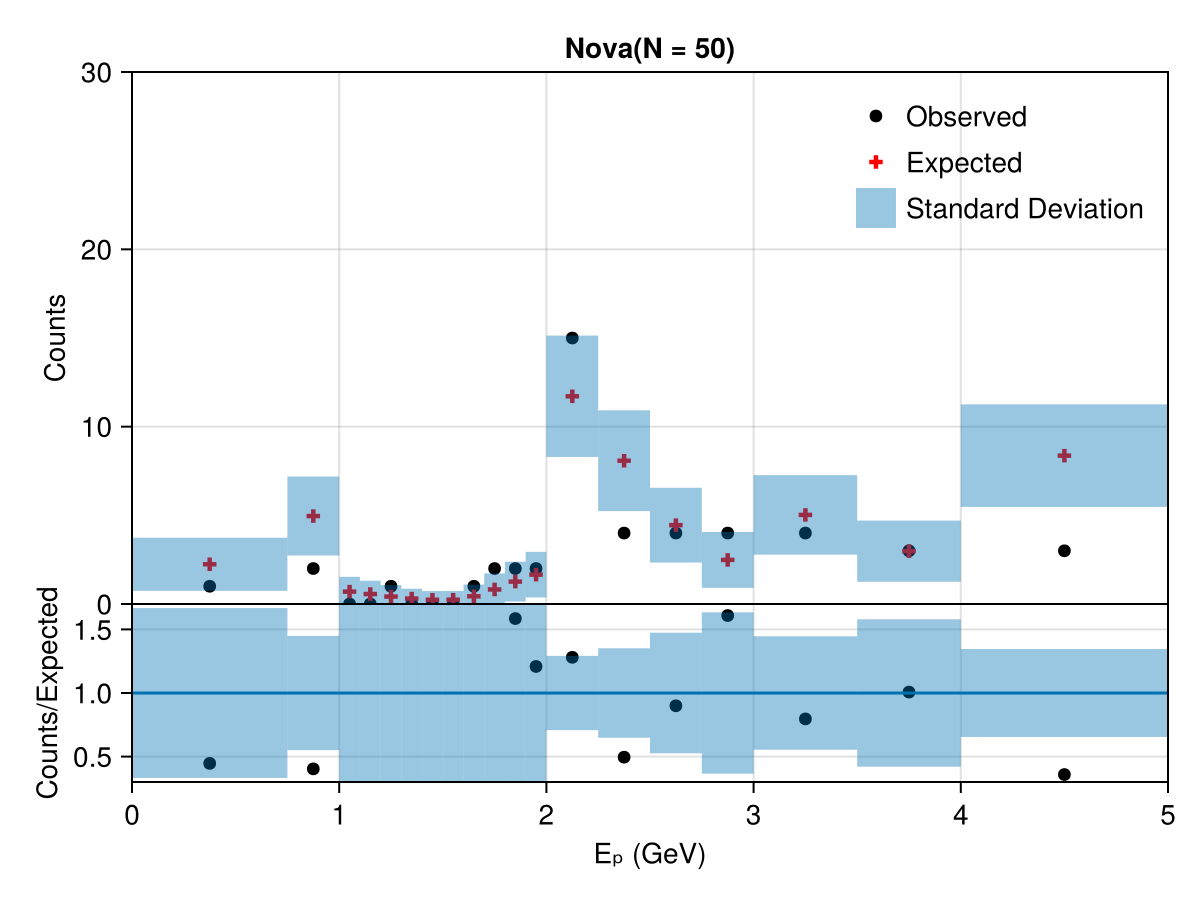

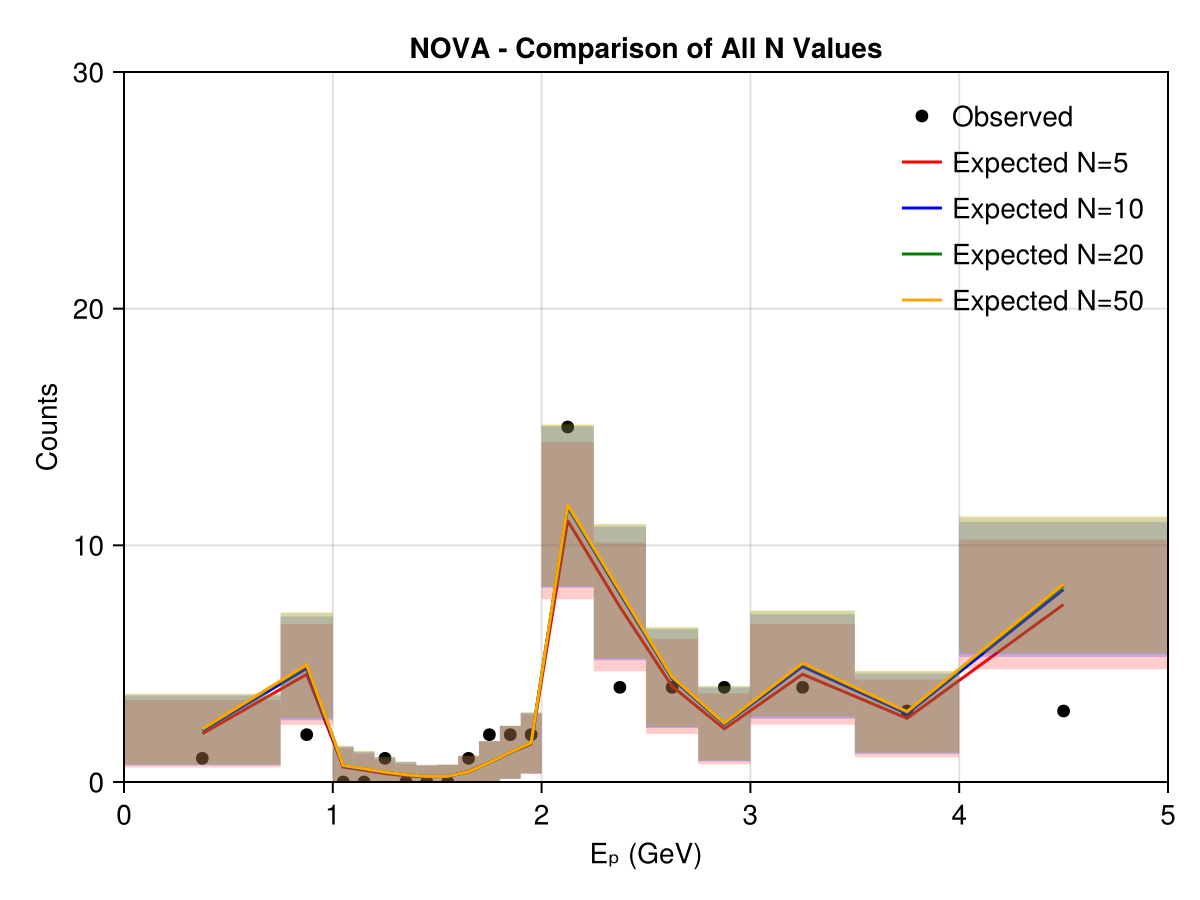

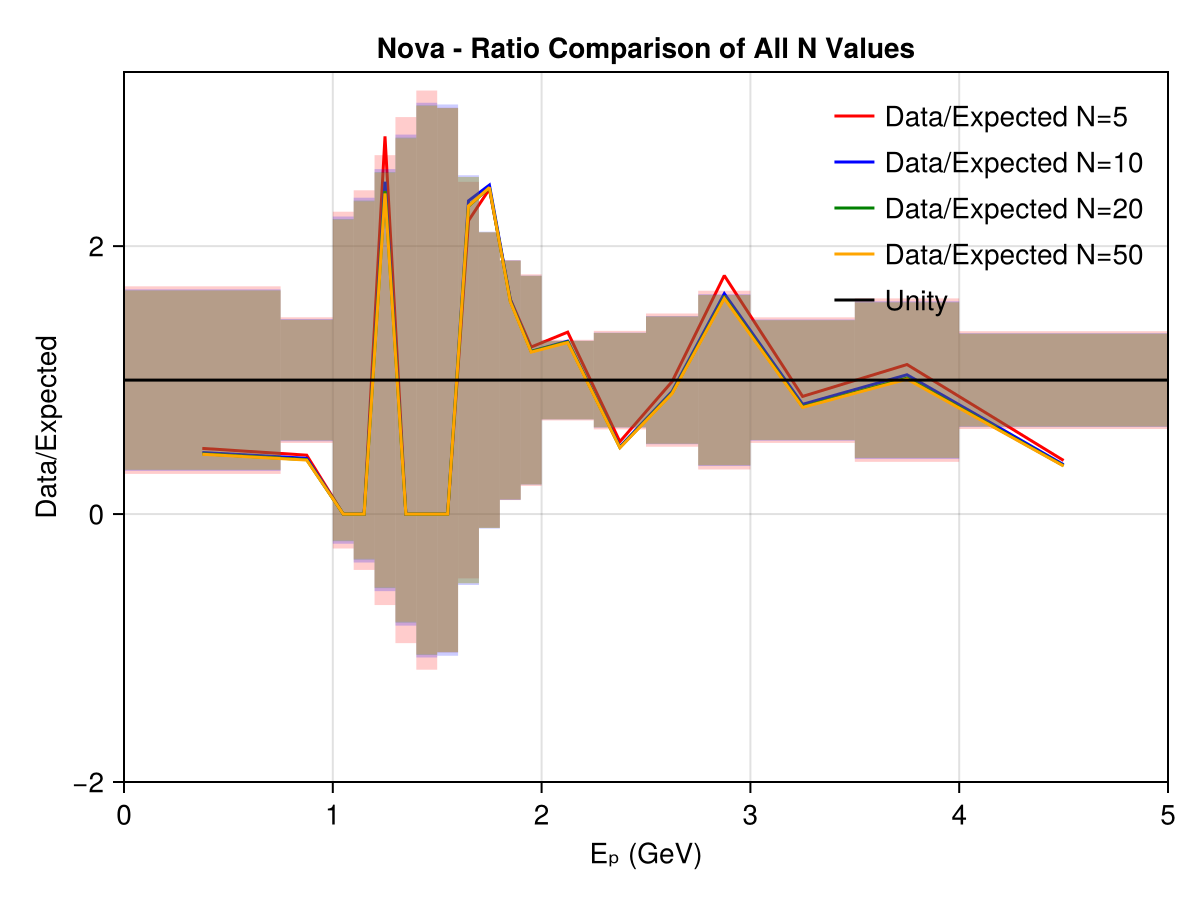

LoadError: SYSTEM: show(lasterr) caused an error

In [219]:
img = experiments.nova.plot(p)
display("image/png", img)
#save("/home/sofialon/Newtrinos.jl/natural plot/nova/nova_data_NNM.png", img)

In [16]:

all_priors = Newtrinos.get_priors(experiments)


vars_to_scan = ( r=31,  Δm²₃₁ =31)  

modified_priors = (
   N =all_priors.N, 
   m₀= all_priors.m₀,
   r = all_priors.r,
    
   
  

    Δm²₂₁ = p.Δm²₂₁,  
    Δm²₃₁ = all_priors.Δm²₃₁ , 
    δCP =  all_priors.δCP,    
    θ₁₂ = p.θ₁₂,    
    θ₁₃= p.θ₁₃,       
    θ₂₃ = all_priors.θ₂₃   
    

)


(N = Uniform{Float64}(a=1.0, b=90.0), m₀ = Uniform{Float64}(a=0.001, b=1.0), r = Uniform{Float64}(a=1.0e-8, b=1.0), Δm²₂₁ = 7.53e-5, Δm²₃₁ = Uniform{Float64}(a=0.002, b=0.003), δCP = Uniform{Float64}(a=0.0, b=6.283185307179586), θ₁₂ = 0.5872523687443223, θ₁₃ = 0.1454258194533693, θ₂₃ = Uniform{Float64}(a=0.5235987755982988, b=1.0471975511965976))

In [17]:

likelihood = Newtrinos.generate_likelihood(experiments);


In [18]:

result = Newtrinos.scan(likelihood, modified_priors, vars_to_scan, p)

Progress: 100%|█████████████████████████████████████████| Time: 0:01:40


NewtrinosResult((r = [1.0e-8, 0.033333343, 0.066666676, 0.100000009, 0.133333342, 0.166666675, 0.200000008, 0.233333341, 0.266666674, 0.30000000699999996  …  0.700000003, 0.733333336, 0.766666669, 0.8000000020000001, 0.8333333350000001, 0.866666668, 0.900000001, 0.9333333340000001, 0.966666667, 1.0], Δm²₃₁ = [0.002, 0.002033333333333333, 0.0020666666666666667, 0.0021, 0.0021333333333333334, 0.0021666666666666666, 0.0022, 0.0022333333333333333, 0.002266666666666667, 0.0023  …  0.0027, 0.0027333333333333333, 0.002766666666666667, 0.0028, 0.0028333333333333335, 0.0028666666666666667, 0.0029000000000000002, 0.0029333333333333334, 0.002966666666666667, 0.003]), (N = [20.0 20.0 … 20.0 20.0; 20.0 20.0 … 20.0 20.0; … ; 20.0 20.0 … 20.0 20.0; 20.0 20.0 … 20.0 20.0], m₀ = [0.01 0.01 … 0.01 0.01; 0.01 0.01 … 0.01 0.01; … ; 0.01 0.01 … 0.01 0.01; 0.01 0.01 … 0.01 0.01], nc_norm = [1.0 1.0 … 1.0 1.0; 1.0 1.0 … 1.0 1.0; … ; 1.0 1.0 … 1.0 1.0; 1.0 1.0 … 1.0 1.0], nutau_cc_norm = [1.0 1.0 … 1.0 1.0; 1

In [690]:
#likelihood = Newtrinos.generate_likelihood(experiments);
#result = Newtrinos.scan(likelihood, Newtrinos.get_priors(experiments), (θ₁₃=31, Δm²₃₁=31), p)
#result = Newtrinos.profile(likelihood,  Newtrinos.get_priors(experiments), (r=31, m₀=31), p; gradient_map=false)

In [19]:
JLD2.@save "scan_nova_rdelta_NNM.jld2" result

In [20]:
using CairoMakie

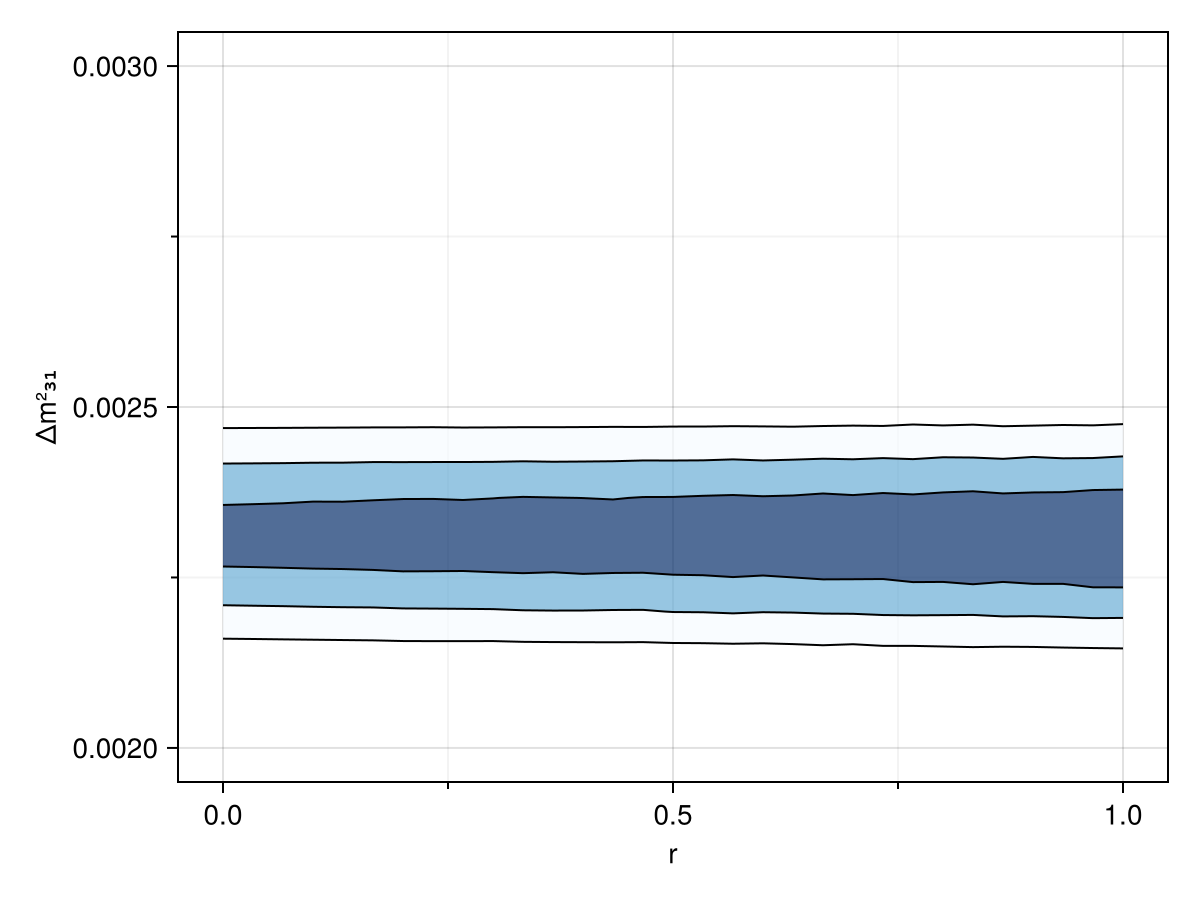

In [21]:
img = CairoMakie.plot(result)
display("image/png", img)
save("/home/sofialon/Newtrinos.jl/natural plot/nova/nova_rdelta_NNM.png", img)


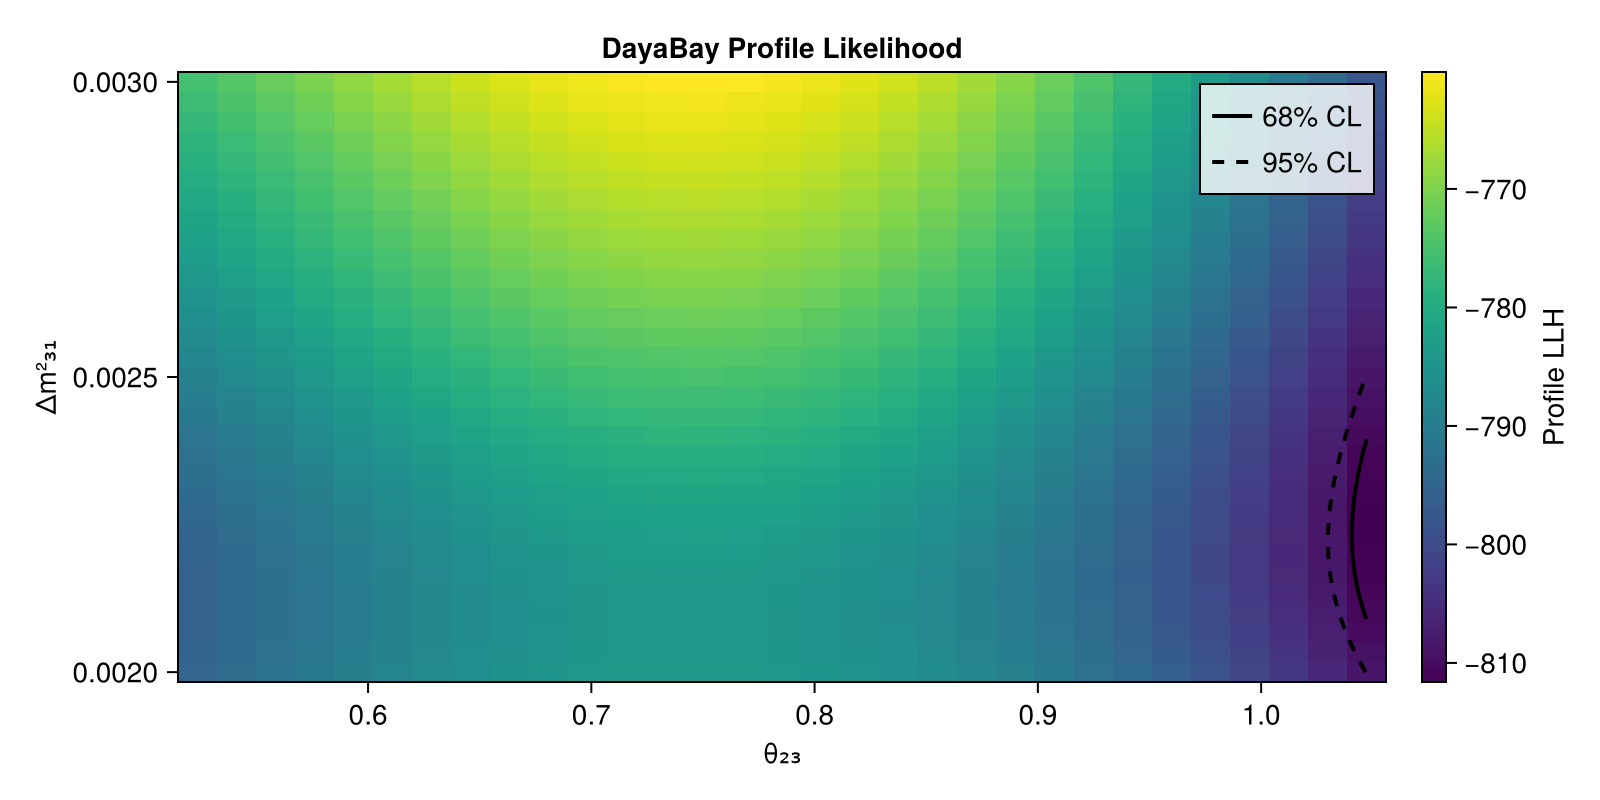

In [18]:
llh_data = Float64.(result.values.llh)

fig = Figure(size=(800, 400))

ax = Axis(fig[1,1], 
    xlabel=String(keys(result.axes)[1]), 
    ylabel=String(keys(result.axes)[2]), 
    title="DayaBay Profile Likelihood"
)

hm = CairoMakie.heatmap!(ax, result.axes[1], result.axes[2], result.values.llh)

# Find minimum LLH value (best fit point)
min_llh = minimum(llh_data)

# Calculate contour levels for 68% and 95% confidence (for 2 parameters)
contour_68 = min_llh + 1.15  # 2.30/2
contour_95 = min_llh + 2.995  # 5.99/2

# Add contour lines separately (this avoids the linestyle array issue)
CairoMakie.contour!(ax, result.axes[1], result.axes[2], result.values.llh, 
         levels=[contour_68], color=:black, linewidth=2)
CairoMakie.contour!(ax, result.axes[1], result.axes[2], result.values.llh, 
         levels=[contour_95], color=:black, linewidth=2, linestyle=:dash)

# Add legend for contour lines
lines!(ax, [NaN], [NaN], color=:black, linewidth=2, label="68% CL")
lines!(ax, [NaN], [NaN], color=:black, linewidth=2, linestyle=:dash, label="95% CL")
axislegend(ax, position=:rt, backgroundcolor=(:white, 0.8))

Colorbar(fig[1,2], hm, label="Profile LLH")

#save("/home/sofialon/Newtrinos.jl/natural plot/dayabay/dayabay_rm₀_NNM_profN.png", fig)
fig

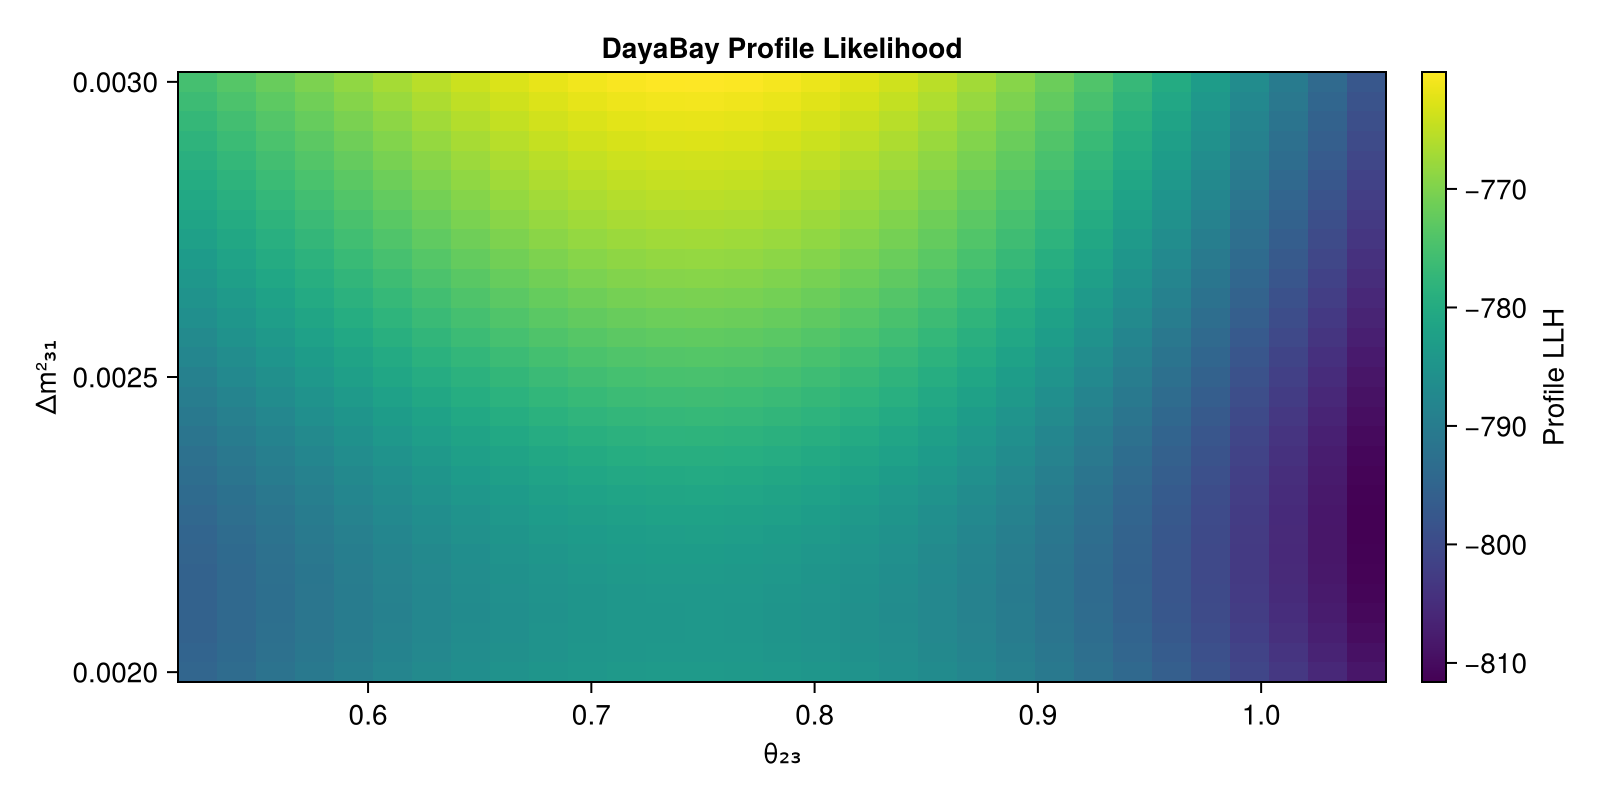

In [19]:
llh_data = Float64.(result.values.llh)


fig = Figure(size=(800, 400))

ax = Axis(fig[1,1], 
    xlabel=String(keys(result.axes)[1]), 
    ylabel=String(keys(result.axes)[2]), 
    title="DayaBay Profile Likelihood"
)

hm = CairoMakie.heatmap!(ax, result.axes[1], result.axes[2], result.values.llh)
Colorbar(fig[1,2], hm, label="Profile LLH")

#save("/home/sofialon/Newtrinos.jl/natural_plot/dayabay_rN_NND_profthetadeltam_.png", fig)
fig

Likelihood ratio test


In [20]:
JLD2.@load "scan_dayabay_thetadeltam_SM.jld2" result
ll_0 = result.values.llh

JLD2.@load "scan_dayabay_thetadeltam_NND_profN.jld2" result
ll_1 = result.values.llh

pvalue =Newtrinos.likelihood_ratio_test(ll_0,ll_1, 2)

ll_0: Any[-302.4716069851248 -299.3814874105783 -296.4203722706933 -293.59234495586077 -290.9012228039638 -288.35056712385074 -285.94369439814386 -283.68368793802586 -281.57340928265756 -279.61550867771734 -277.81243402826044 -276.16643779754367 -274.67958141218804 -273.35373683184406 -272.1905850449926 -271.19161135872866 -270.35809745648305 -269.69111030125646 -269.19148806087566 -268.8598233242585 -268.6964439622668 -268.70139206213855 -268.8744014299001 -269.21487420974427 -269.7218572126701 -270.39401857825914 -271.22962541301723 -272.22652305612775 -273.38211661851614 -274.6933554238578 -276.1567209506018; -292.6154096192527 -289.4012557669376 -286.3225331994417 -283.38344656945026 -280.58792640021977 -277.93964176186483 -275.4420141000042 -273.09823138122744 -270.9112617484946 -268.88386593278574 -267.0186077414477 -265.3178620348856 -263.78381970757397 -262.4184893028572 -261.22369500996587 -260.2010709126542 -259.35205147876366 -258.67785839617017 -258.1794839707194 -257.85767

1.0

Oscillations


In [41]:

# STANDARD MODEL
E_range = range(0.5,10, length=1000) 
L=810
L_vec = [L]

osc_cfg_SM = Newtrinos.osc.OscillationConfig(
    flavour=Newtrinos.osc.ThreeFlavour(),
    propagation=Newtrinos.osc.Basic(),
    states=Newtrinos.osc.All(),
    interaction=Newtrinos.osc.SI()
    )

osc_SM = Newtrinos.osc.configure(osc_cfg_SM)
 

atm_flux = Newtrinos.atm_flux.configure()
earth_layers = Newtrinos.earth_layers.configure()
xsec_SM = Newtrinos.xsec.configure()

physics_SM = (; osc=osc_SM, atm_flux, earth_layers, xsec=xsec_SM);


experiments_SM = (

    nova = Newtrinos.nova.configure(physics_SM),
);

p_SM = Newtrinos.get_params(experiments_SM)

osc_prob_SM = Newtrinos.osc.get_osc_prob(osc_cfg_SM)


probab_SM = osc_prob_SM(collect(E_range), L_vec, p; anti=true)

=== LOADING NUE DATA ===
Using :fN for neutrino data
Found MC directory: prediction_components_nue_fhc
Using :fN field, length: 23
Created: Signal1, Signal2, Signal3
Using :fN field, length: 23
Created: Wrong_sign_bkg1, Wrong_sign_bkg2, Wrong_sign_bkg3
Using :fN field, length: 23
Created: Beam_nue_bkg1, Beam_nue_bkg2, Beam_nue_bkg3
Using :fN field, length: 23
Created: NC_bkg1, NC_bkg2, NC_bkg3
Using :fN field, length: 23
Created: NumuCC_bkg1, NumuCC_bkg2, NumuCC_bkg3
Using :fN field, length: 23
Created: TauCC_bkg1, TauCC_bkg2, TauCC_bkg3
Using :fN field, length: 23
Created: Cosmic_bkg1, Cosmic_bkg2, Cosmic_bkg3
Using :fN field, length: 23
Created: Total_pred1, Total_pred2, Total_pred3
=== LOADING NUEBAR DATA ===
Using :fN for antineutrino data
Found MC directory: prediction_components_nue_rhc
Using :fN field, length: 23
Created: Signal1, Signal2, Signal3
Using :fN field, length: 23
Created: Wrong_sign_bkg1, Wrong_sign_bkg2, Wrong_sign_bkg3
Using :fN field, length: 23
Created: Beam_nue_

[ Info: Loading NOvA data


1000×1×3×3 Array{Float64, 4}:
[:, :, 1, 1] =
 0.9069452157631035
 0.9036651921584132
 0.9017080834473145
 0.9010216381353084
 0.9015154361137327
 0.9030729357154513
 0.9055616190842493
 0.9088412532267084
 0.9127703944258465
 0.9172113249659739
 0.9220336379172318
 0.927116689431564
 0.9323511271574965
 ⋮
 0.9947446253797604
 0.9947544955908768
 0.9947643382346977
 0.994774153412954
 0.9947839412269126
 0.9947937017773776
 0.9948034351646939
 0.9948131414887489
 0.9948228208489751
 0.9948324733443533
 0.9948420990734134
 0.9948516981342393

[:, :, 2, 1] =
 0.014385870713263214
 0.01730443449974073
 0.020041776439870772
 0.02250521580086591
 0.024629481163403265
 0.026373723782354398
 0.027718032378655753
 0.028659808561209046
 0.02921024958386834
 0.029391096038134133
 0.029231734313094154
 0.028766694134083944
 0.028033546864435
 ⋮
 0.0031483971670383695
 0.0031425975176499654
 0.003136813729496944
 0.0031310457453860474
 0.003125293508378625
 0.003119556961789251
 0.00311383604918444

In [42]:
# NNATURALNESS WITH DIFFERENT N 


osc_prob = Newtrinos.osc.get_osc_prob(osc_cfg)

p= Newtrinos.get_params(experiments)
p_5 = merge(p, (N = ftype(5),))
p_10 = merge(p, (N = ftype(10),))
p_20 = merge(p, (N = ftype(20),))
p_50 = merge(p, (N = ftype(50),))

probab_5 = osc_prob(collect(E_range), L_vec, p_5; anti=false)
probab_10 = osc_prob(collect(E_range), L_vec, p_10; anti=false)
probab_20 = osc_prob(collect(E_range), L_vec, p_20; anti=false)
probab_50 = osc_prob(collect(E_range), L_vec, p_50; anti=false)

p_0 = merge(p, (r = ftype(0),))
p_025 = merge(p,  (r = ftype(0.25),))
p_05 = merge(p,  (r = ftype(0.5),))
p_1 = merge(p,  (r = ftype(1),))


probab_0 = osc_prob(collect(E_range), L_vec, p_0; anti=false)
probab_025 = osc_prob(collect(E_range), L_vec, p_025; anti=false)
probab_05 = osc_prob(collect(E_range), L_vec, p_05; anti=false)
probab_1 = osc_prob(collect(E_range), L_vec, p_1; anti=false)


1000×1×60×60 Array{Float64, 4}:
[:, :, 1, 1] =
 0.8975157322003805
 0.893131852525819
 0.8942480287811612
 0.8942454255403147
 0.893718485189687
 0.8943055043086765
 0.8958861982518969
 0.90009988098412
 0.9075067078185477
 0.9079236042257391
 0.90988381598691
 0.9169161469310457
 0.9252849868664368
 ⋮
 0.9847556387533125
 0.9850763210007257
 0.9856595110342503
 0.9860827763787819
 0.9868837507159832
 0.9877616401025396
 0.9884037284156316
 0.9893528635992556
 0.9901503258261886
 0.9906839762194044
 0.9914504976080742
 0.9918732935437169

[:, :, 2, 1] =
 0.07483062949384414
 0.0792323116625754
 0.0831270573723093
 0.08522007079420087
 0.0854709218424467
 0.0860395970140055
 0.08415394779668432
 0.08240632551139232
 0.07848501098243163
 0.07535638762861216
 0.07182988758581094
 0.06740304211983929
 0.06294524507118104
 ⋮
 0.003390831743795904
 0.0033365283296187174
 0.0033644518713251696
 0.0033882490291846906
 0.003330917705471674
 0.0033644325809280232
 0.0033620896359615937
 0.003298

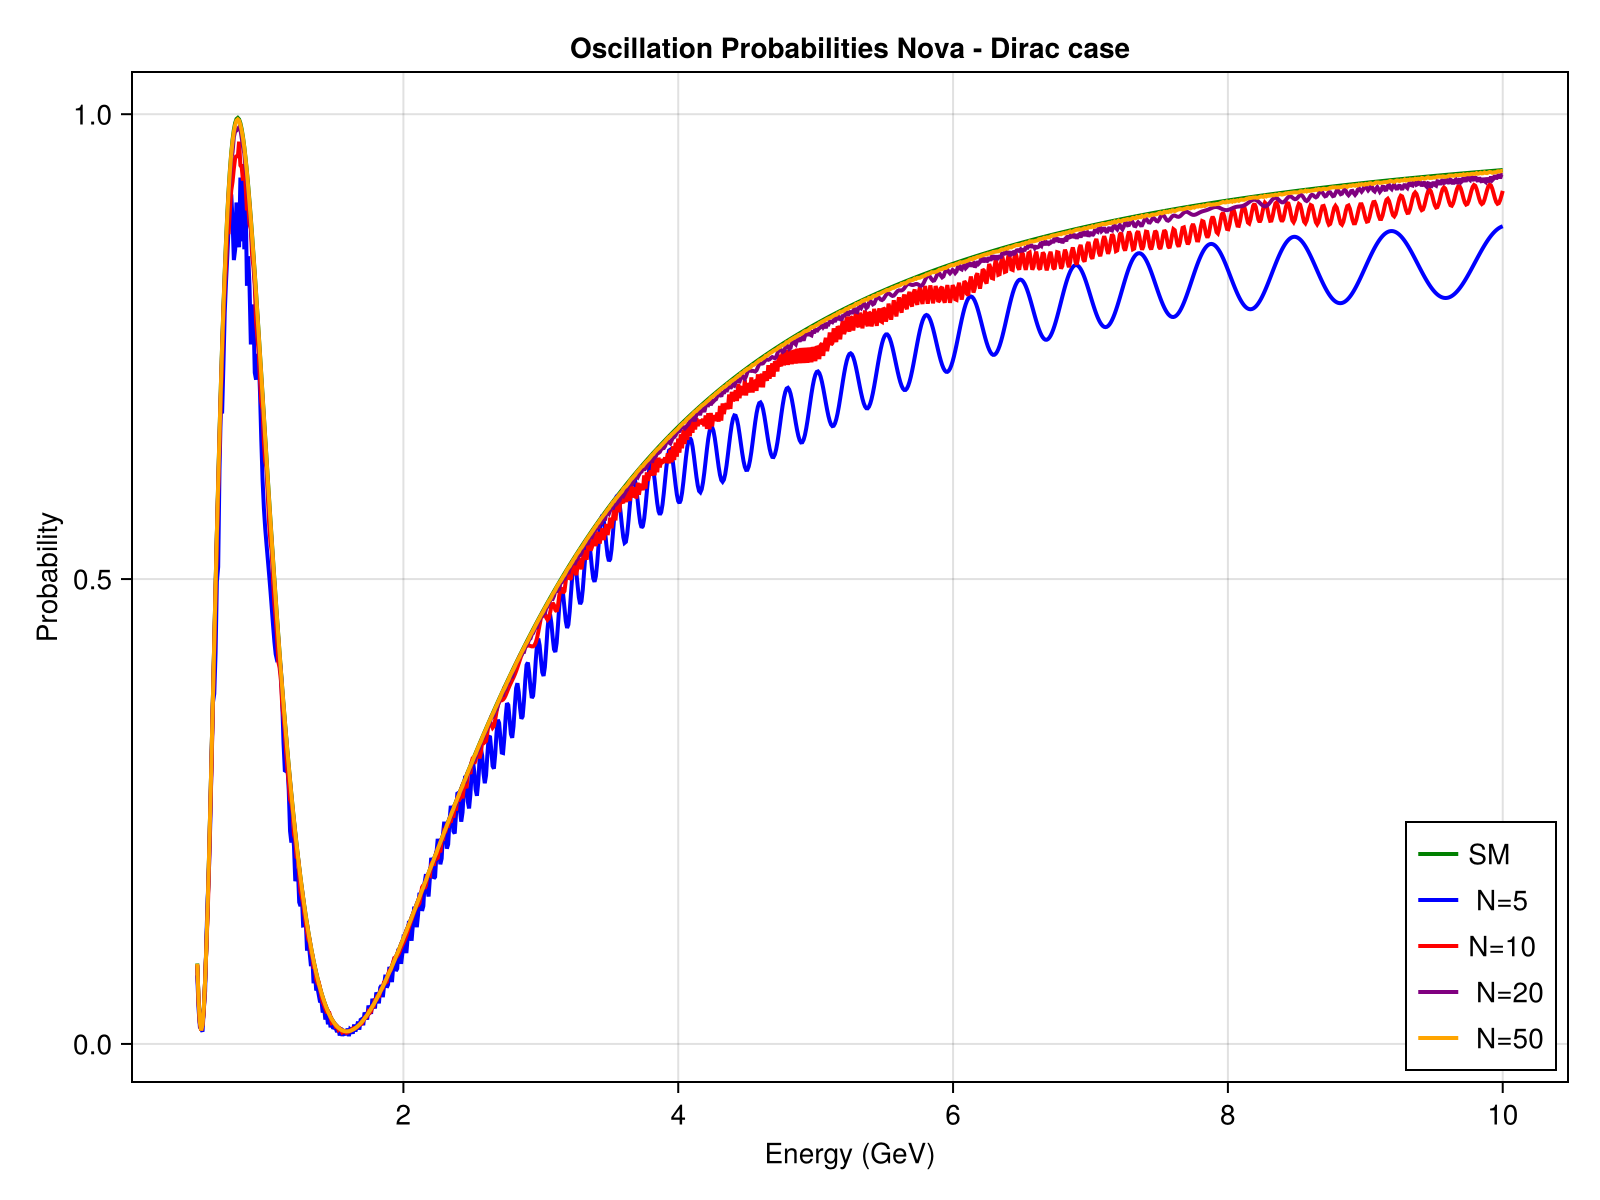

In [43]:

fig = Figure(size=(800, 600))
ax = Axis(fig[1,1], 
    xlabel = "Energy (GeV)",
    ylabel = "Probability", 
    title = "Oscillation Probabilities Nova - Dirac case"
)

# Plot the lines
lines!(ax, E_range, probab_SM[:, 1, 2,2], label="SM", linewidth=2, color=:green)
lines!(ax, E_range, probab_5[:, 1, 2,2], label=" N=5", linewidth=2, color=:blue)
lines!(ax, E_range, probab_10[:, 1, 2,2], label="N=10", linewidth=2, color=:red)
lines!(ax, E_range, probab_20[:, 1, 2,2], label=" N=20", linewidth=2, color=:purple)
lines!(ax, E_range, probab_50[:, 1, 2,2], label=" N=50", linewidth=2, color=:orange)

# Add legend and set limits
axislegend(ax, position=:rb)
save("/home/sofialon/Newtrinos.jl/natural plot/nova/osc_nova_N_dirac.png", fig)


fig

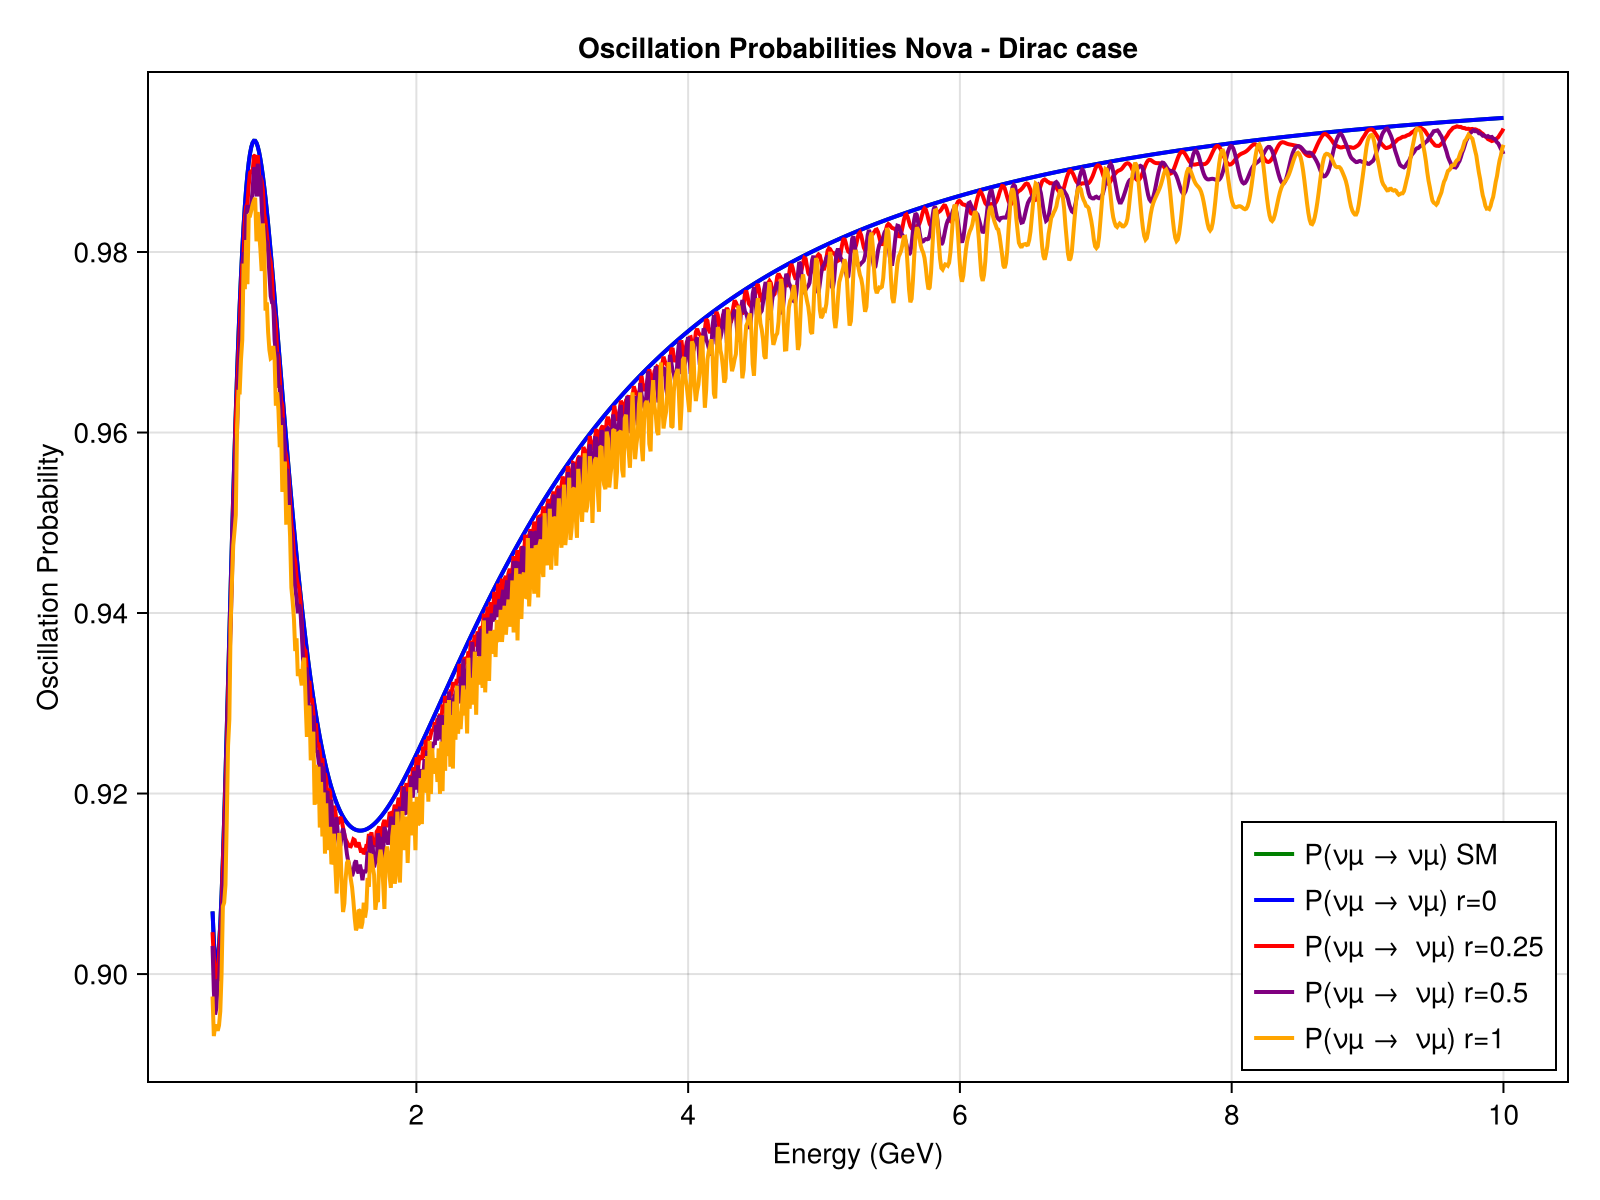

In [44]:

fig = Figure(size=(800, 600))
ax = Axis(fig[1,1], 
    xlabel = "Energy (GeV)",
    ylabel = "Oscillation Probability", 
    title = "Oscillation Probabilities Nova - Dirac case"
)

# Plot the lines
lines!(ax, E_range, probab_SM[:, 1, 1, 1], label="P(νµ → νµ) SM", linewidth=2, color=:green)
lines!(ax, E_range, probab_0[:, 1, 1, 1], label="P(νµ → νµ) r=0", linewidth=2, color=:blue)
lines!(ax, E_range, probab_025[:, 1, 1, 1], label="P(νµ →  νµ) r=0.25", linewidth=2, color=:red)
lines!(ax, E_range, probab_05[:, 1, 1, 1], label="P(νµ →  νµ) r=0.5", linewidth=2, color=:purple)
lines!(ax, E_range, probab_1[:, 1, 1, 1], label="P(νµ →  νµ) r=1", linewidth=2, color=:orange)

# Add legend and set limits
axislegend(ax, position=:rb)
save("/home/sofialon/Newtrinos.jl/natural plot/nova/osc_nova_r_dirac.png", fig)

fig